# Santander Customer Satisfaction evaluation with XGBoost algorithm

## Importing Libraries

In [100]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For plots to appear in the notebook
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA


# Model implementation
from xgboost import XGBClassifier


# Model evaluation
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")
sns.set(color_codes=True)

## Importing dataset

In [2]:
dataset = pd.read_csv("Dataset/train.csv")

In [3]:
dataset.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
dataset.shape

(76020, 371)

## Performing EDA

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [6]:
dataset.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [7]:
dataset.isnull().sum().sum()

0

In [8]:
dataset.isna().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [9]:
dataset.isna().sum().sum()

0

In [10]:
dataset.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [11]:
dataset.dtypes

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object

In [12]:
dataset.dtypes.nunique()
# To ensure we have only float64 and int64 types

2

In [13]:
dataset["TARGET"].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [14]:
dataset["TARGET"].value_counts(normalize = True)

0    0.960431
1    0.039569
Name: TARGET, dtype: float64

<AxesSubplot:title={'center':'Distribution of Target values'}, ylabel='TARGET'>

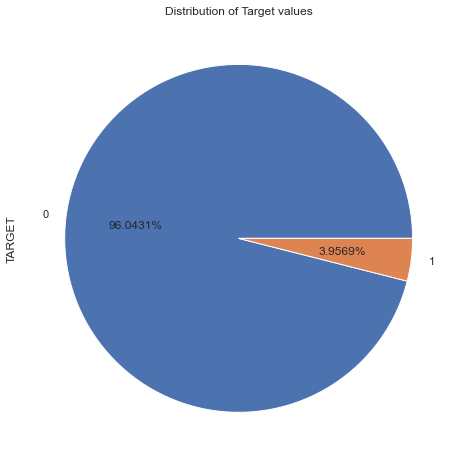

In [15]:
plt.figure(figsize = (12, 8))
plt.title("Distribution of Target values")
dataset["TARGET"].value_counts(normalize = True).plot.pie(autopct = "%1.4f%%")

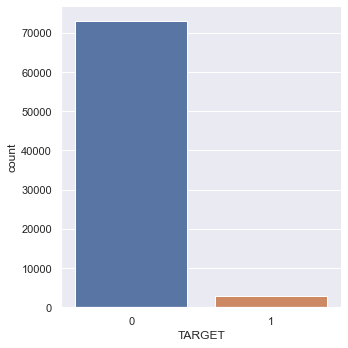

In [16]:
sns.catplot(data = dataset, x = 'TARGET', kind = "count")

## Pre-Processing 

In [60]:
X = dataset.drop(labels = ['TARGET', 'ID'], axis = 1)
y = dataset.TARGET

In [55]:
X.shape, y.shape

((76020, 369), (76020,))

In [56]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [57]:
scaled_X

array([[ 3.90744048e-02, -7.88248631e-01, -5.33881045e-02, ...,
        -1.88169080e-02, -1.98468529e-02, -4.27182680e-01],
       [ 3.90744048e-02,  6.07525955e-02, -5.33881045e-02, ...,
        -1.88169080e-02, -1.98468529e-02, -3.72038298e-01],
       [ 3.90744048e-02, -7.88248631e-01, -5.33881045e-02, ...,
        -1.88169080e-02, -1.98468529e-02, -2.73191237e-01],
       ...,
       [ 3.90744048e-02, -7.88248631e-01, -5.33881045e-02, ...,
        -1.88169080e-02, -1.98468529e-02, -2.36542515e-01],
       [ 3.90744048e-02, -6.33884772e-01, -5.33881045e-02, ...,
        -1.88169080e-02, -1.98468529e-02, -1.80428318e-01],
       [ 3.90744048e-02,  9.86935752e-01, -5.33881045e-02, ...,
        -1.88169080e-02, -1.98468529e-02,  4.11519699e-04]])

In [21]:
pca = PCA()
pca.fit(scaled_X)

PCA()

In [22]:
scaled_X

array([[ 3.90744048e-02, -7.88248631e-01, -5.33881045e-02, ...,
        -1.88169080e-02, -1.98468529e-02, -4.27182680e-01],
       [ 3.90744048e-02,  6.07525955e-02, -5.33881045e-02, ...,
        -1.88169080e-02, -1.98468529e-02, -3.72038298e-01],
       [ 3.90744048e-02, -7.88248631e-01, -5.33881045e-02, ...,
        -1.88169080e-02, -1.98468529e-02, -2.73191237e-01],
       ...,
       [ 3.90744048e-02, -7.88248631e-01, -5.33881045e-02, ...,
        -1.88169080e-02, -1.98468529e-02, -2.36542515e-01],
       [ 3.90744048e-02, -6.33884772e-01, -5.33881045e-02, ...,
        -1.88169080e-02, -1.98468529e-02, -1.80428318e-01],
       [ 3.90744048e-02,  9.86935752e-01, -5.33881045e-02, ...,
        -1.88169080e-02, -1.98468529e-02,  4.11519699e-04]])

Text(0, 0.5, 'cumulative explained variance')

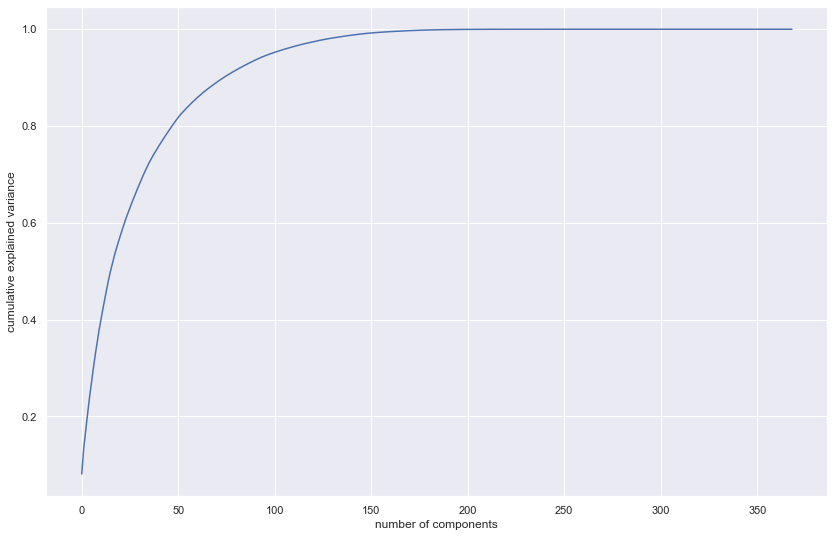

In [23]:
plt.figure(figsize = (14, 9))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
# To know the best n_components' value

In [24]:
# The other way
# pca = PCA(n_components = 0.95)
# pca.fit(scaled_X)
# reduced = pca.transform(scaled_X)

In [25]:
pca = PCA(n_components = 160)
pca_X = pca.fit_transform(scaled_X)

# Or pca = PCA(n_components = 0.97)

In [26]:
pca_df = pd.DataFrame(data = pca_X)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,-2.673553,-1.554621,-0.222497,0.268906,0.152867,1.351671,0.155027,-0.108121,-0.028993,-0.196237,...,0.011545,-0.066097,-0.069281,0.014788,-0.012118,0.000347,0.018955,0.001643,0.001598,0.003170
1,-0.959710,7.752653,-4.195284,5.224158,2.476887,0.249987,0.125222,0.076464,-0.560343,-0.175361,...,0.196163,0.610591,0.201570,-0.304105,-0.010823,-0.236412,0.092783,-0.039609,-0.195874,-0.147857
2,-1.984764,-0.933970,0.011914,-0.081934,0.112219,-0.158695,0.013222,-0.113424,0.041161,0.069412,...,-0.005264,0.131128,0.146883,-0.075247,0.019876,0.027733,-0.051138,0.017827,0.032592,-0.015467
3,4.443608,-1.455849,0.066270,-0.082687,-0.193817,-2.792661,-0.380519,0.131692,0.158738,0.294382,...,-0.131168,-0.225057,-0.466860,-0.196421,0.021324,0.099830,-0.206162,0.023816,0.216208,0.070423
4,2.081770,8.542871,4.085268,-10.280626,-5.907338,1.590619,-0.253970,0.782403,-0.519460,0.031622,...,0.318785,1.954898,0.876900,-0.732823,0.047080,-0.155360,-0.181199,-0.318939,0.136334,0.182271


In [27]:
pca_df.shape

(76020, 160)

## Training and Test sets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size = 0.15, random_state = 1)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(64617, 160)
(11403, 160)
(64617,)
(11403,)


## XGBoost

In [71]:
# Lets implement a basic xgboost first
xg_model = XGBClassifier(objective = "binary:logistic")
xg_model.fit(X_train, y_train)

[16:12:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
y_pred = xg_model.predict(X_test)

In [74]:
score = xg_model.score(X_test, y_test)
score

0.9587827764623345

> We got ~96% accuracy without tuning hyperparameters and feature selection

## Hyperparameters tuning

In [33]:
params = {
  'max_depth': [3 , 6, 9, 12, 15, 18],
  'learning_rate': np.logspace(0.05, 0.99, 10),
  'min_child_weight': np.logspace(1, 10, 5),
  'gamma': np.logspace(0, 0.99, 10),
  'colsample_bytree': [0.3, 0.4, 0.5, 0.7]
}
xgbc = XGBClassifier()

In [34]:
clf = RandomizedSearchCV(xgbc,
                   param_distributions = params,
                   n_iter = 10,
                   scoring = 'accuracy', 
                   n_jobs = -1,
                   cv = 10,
                   verbose = 3)
clf.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[15:12:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraint...
       3.54813389, 4.5708819 , 5.88843655, 7.58577575, 9.77237221]),
                                        'learning_rate': array([1.12201845, 1.42706727, 1.81505124, 2.30851836, 

In [35]:
clf.best_score_

0.9604748003292475

In [36]:
clf.best_params_

{'min_child_weight': 10000000000.0,
 'max_depth': 3,
 'learning_rate': 1.1220184543019633,
 'gamma': 1.6595869074375607,
 'colsample_bytree': 0.3}

In [37]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=1.6595869074375607, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=1.1220184543019633, max_delta_step=0, max_depth=3,
              min_child_weight=10000000000.0, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Update our XGBoost model

In [38]:
xg_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=1.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.8150512355968187, max_delta_step=0, max_depth=3,
              min_child_weight=1778.2794100389228, missing=np.nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=20, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=20, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [66]:
xgc_acc = cross_val_score(xg_model, pca_X, y, cv = 15, scoring = "accuracy")
predicted_y = np.mean(xgc_acc)

[16:05:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:06:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [67]:
predicted_y

0.960431465403841

# 96% => Accuracy


In [75]:
y_predict = xg_model.predict(X_test)

In [77]:
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[10926    23]
 [  447     7]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     10949
           1       0.23      0.02      0.03       454

    accuracy                           0.96     11403
   macro avg       0.60      0.51      0.50     11403
weighted avg       0.93      0.96      0.94     11403



Text(0.5, 1.0, 'Truth table')

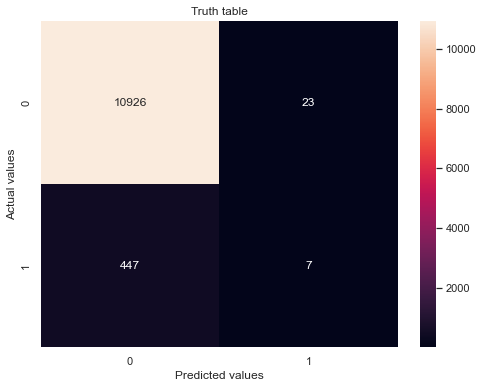

In [84]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True, fmt = 'g')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Truth table")

In [85]:
df_test = pd.read_csv("Dataset/test.csv")
df_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [87]:
resultDataSet = pd.DataFrame()
resultDataSet['ID'] = df_test['ID']
resultDataSet.head()

,ID
0,2
1,5
2,6
3,7
4,9


In [88]:
df_test.drop(labels = ['ID'], inplace = True, axis = 1)

In [90]:
df_test.isnull().sum().sum()

0

In [92]:
df_test.isna().sum().sum()

0

In [93]:
scaled_test = scaler.fit_transform(df_test)

In [94]:
pca_test = pca.fit_transform(scaled_test)

In [96]:
testpca_df = pd.DataFrame(data = pca_test)
testpca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,-1.694087,-0.626255,0.032916,0.127297,0.156587,0.003317,-0.339214,-0.029445,-0.162608,0.084430,...,0.000139,-0.000416,0.003082,-0.018009,-0.012425,0.043800,-0.009895,-0.033615,-0.007692,-0.005370
1,-2.161757,-0.883924,0.158120,-0.038142,0.076730,-0.028354,0.290696,0.034931,0.157630,0.049956,...,-0.002608,0.003129,-0.010361,-0.023134,-0.006886,0.033552,-0.007046,-0.038197,-0.010816,-0.014275
2,-0.901197,-0.809910,-0.000116,0.085068,0.237111,0.032098,-0.971755,0.034214,-0.158592,0.090094,...,0.028401,0.048878,-0.042506,-0.011384,0.059625,-0.085853,0.100580,0.072259,-0.053468,-0.099426
3,-2.664792,-1.535768,-0.023730,-0.370881,-0.012527,-0.055606,1.288184,-0.067113,0.187999,-0.165303,...,-0.000811,-0.004919,0.004856,0.010671,-0.025003,0.038068,-0.016088,0.008263,0.025550,0.014774
4,-1.835126,-0.792498,0.025186,0.093675,0.146566,0.004316,-0.314105,-0.031074,-0.166042,0.086607,...,-0.008350,-0.002725,0.011781,0.015723,-0.010718,0.015511,-0.012487,0.000137,0.032977,0.013634


In [97]:
predicted_test = xg_model.predict(testpca_df)

In [98]:
resultDataSet['TARGET'] = predicted_test
resultDataSet  

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0
...,...,...
75813,151831,0
75814,151832,0
75815,151833,0
75816,151834,0


In [99]:
resultDataSet.to_csv('submission.csv', index=False)